# STO-LTO model creation

authors: [Toma Susi]
date: 2024/09/02

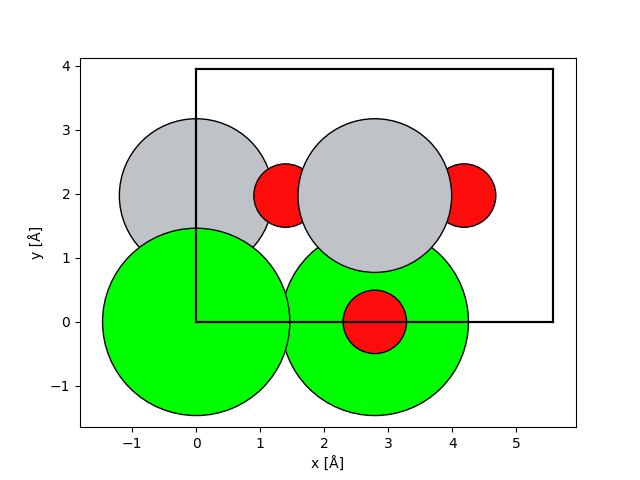

In [59]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

from ase.build import surface

srtio3 = ase.io.read("data/SrTiO3.cif")

srtio3_110 = surface(srtio3, indices=(1,0,1), layers=2, periodic=True)
srtio3_110.wrap()

atoms = abtem.orthogonalize_cell(srtio3_110)
abtem.show_atoms(atoms)

repeated_srtio3 = srtio3_110.copy()
repeated_srtio3 *= (3, 4, 10)

In [14]:
%matplotlib ipympl
from IPython.display import display
import ipywidgets

# widget figure generation
with plt.ioff():
    dpi = 72
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(675/dpi, 300/dpi), dpi=dpi)

supercell = srtio3_110.copy()
supercell.center(2, axis=2)

top = abtem.show_atoms(supercell, ax=ax1, show_periodic=True)
beam = abtem.show_atoms(supercell, ax=ax2, plane='xz', show_periodic=True, legend=True)
ax1.set_title("Top view")
ax2.set_title("Beam view")

fig.tight_layout()

fig.canvas.resizable = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = True
fig.canvas.layout.width = '675px'
fig.canvas.layout.height = '330px'
fig.canvas.toolbar_position = 'bottom'

In [65]:
def update_atoms(x, y, z, vac, axis):
    ax1.cla()
    ax2.cla()
    axis = tuple(map(int, axis.split(' ')))
    
    cell = surface(srtio3, indices=axis, layers=2, periodic=True)
    cell = abtem.orthogonalize_cell(cell)
    cell.wrap()
    supercell = cell*(x,y,z)
    supercell.center(vac, axis=2)
    
    top = abtem.show_atoms(supercell, ax=ax1, show_periodic=True)
    beam = abtem.show_atoms(supercell, ax=ax2, plane='xz', show_periodic=True, legend=True)
    fig.canvas.draw_idle()
    return None

In [68]:
# Widgets
dropdown = ipywidgets.Dropdown(
    options = ['1 1 0','1 1 1','1 0 0'],
    value='1 1 0',
    layout = ipywidgets.Layout(width='200px',height='30px'),
)

style = {
    'description_width': 'initial',
}

sliderx = ipywidgets.IntSlider(
    orientation='horizontal',
    description='x repetitions: ',
    value=1,
    min=1,
    max=10,
    style = style,
)

slidery = ipywidgets.IntSlider(
    orientation='horizontal',
    description='y repetitions: ',
    value=1,
    min=1,
    max=10,
    style = style,
)

sliderz = ipywidgets.IntSlider(
    orientation='horizontal',
    description='z repetitions: ',
    value=1,
    min=1,
    max=10,
    style = style,
)

slidervac = ipywidgets.FloatSlider(
    orientation='horizontal',
    description='vacuum (A): ',
    value=2,
    min=1,
    max=10,
    step=1,
    style = style,
)

ipywidgets.interactive_output(
    update_atoms, 
    {
        'x':sliderx,
        'y':slidery,
        'z':sliderz,
        'vac':slidervac,
        'axis':dropdown
    },
)
None

In [69]:
#| label: app:sto_supercell

widget = ipywidgets.VBox(
    [
        fig.canvas,
        ipywidgets.HBox([
            ipywidgets.VBox([
                sliderx,
                slidery,
                sliderz,
                slidervac
            ]),
            ipywidgets.VBox([
                ipywidgets.Label('Zone axis',layout=ipywidgets.Layout(width='100px',height='30px')), 
                dropdown,
            ])
        ]),
    ],
)

display(widget);

In [107]:
sto_lto = repeated_srtio3.copy()

mask = sto_lto.symbols == "Sr"

mask = mask * (sto_lto.positions[:, 1] < 7.5)

sto_lto.numbers[mask] = 57

ase.io.write("data/sto_lto.cif", sto_lto)